In [31]:
# ✅ Step 1: Go to your project folder manually
import os
import sys

# 🔁 Force the notebook to move into your project root (adjust path if needed)
os.chdir(r"C:\Users\sudha\DS project 1\EduInsight_")
print("Current working dir:", os.getcwd())

# ✅ Step 2: Add utils/ folder to Python path
sys.path.insert(0, os.path.abspath("utils"))

# ✅ Step 3: Now import your preprocessing function
from data_preprocessing import load_and_preprocess_data

# ✅ Step 4: Now import all ML/data packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 5: Load your dataset (put your CSV in data/student_data.csv)
df = load_and_preprocess_data("data/student_data.csv")

# ✅ Step 6: Preview the data
df.head()
 

Current working dir: C:\Users\sudha\DS project 1\EduInsight_


,student_id,quiz_scores,attendance,performance,avg_quiz_score,attendance_pct,performance_label
0,S01,"85,90,88",95%,High Performer,87.666667,95.0,2
1,S02,"60,65,70",75%,Average,65.000000,75.0,1
2,S03,"30,40,35",60%,At Risk,35.000000,60.0,0
3,S04,"50,55,50",80%,Average,51.666667,80.0,1
4,S05,"90,92,95",98%,High Performer,92.333333,98.0,2


In [33]:
# 👇 Cell 2: Load and preprocess data
from data_preprocessing import load_and_preprocess_data

df = load_and_preprocess_data("data/student_data.csv")

# ✅ Check types
print(df.dtypes)
print(df.head())


student_id            object
quiz_scores           object
attendance            object
performance           object
avg_quiz_score       float64
attendance_pct       float64
performance_label      int64
dtype: object
  student_id quiz_scores attendance     performance  avg_quiz_score  \
0        S01    85,90,88        95%  High Performer       87.666667   
1        S02    60,65,70        75%         Average       65.000000   
2        S03    30,40,35        60%         At Risk       35.000000   
3        S04    50,55,50        80%         Average       51.666667   
4        S05    90,92,95        98%  High Performer       92.333333   

   attendance_pct  performance_label  
0            95.0                  2  
1            75.0                  1  
2            60.0                  0  
3            80.0                  1  
4            98.0                  2  


In [35]:
# 👇 Cell 3: Train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.select_dtypes(include=["float64", "int64"])
y = df["performance_label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 🧠 Predict on test set
y_pred = log_model.predict(X_test)

# 📊 Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1]]


c:\Users\sudha\DS project 1\EduInsight_\venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [37]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 🌲 Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ⚡ XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# 📊 Compare all
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))

print("\n--- XGBoost ---")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))



--- Random Forest ---
Accuracy: 1.0
F1 Score: 1.0

--- XGBoost ---
Accuracy: 0.0
F1 Score: 0.0


c:\Users\sudha\DS project 1\EduInsight_\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:44:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


c:\Users\sudha\DS project 1\EduInsight_\venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


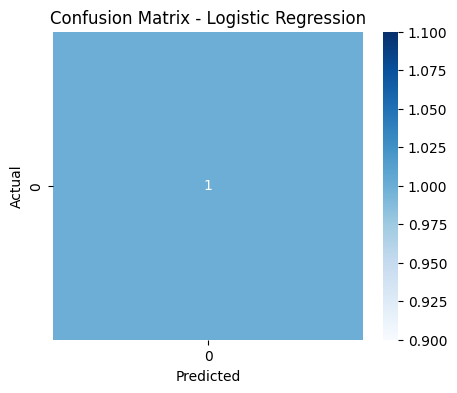

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [39]:
import joblib

# Save models
joblib.dump(log_model, "models/logistic_model.pkl")
joblib.dump(rf_model, "models/random_forest_model.pkl")
joblib.dump(xgb_model, "models/xgboost_model.pkl")


['models/xgboost_model.pkl']

In [40]:
# Load saved model
loaded_model = joblib.load("models/logistic_model.pkl")

# Predict
y_pred = loaded_model.predict(X_test)


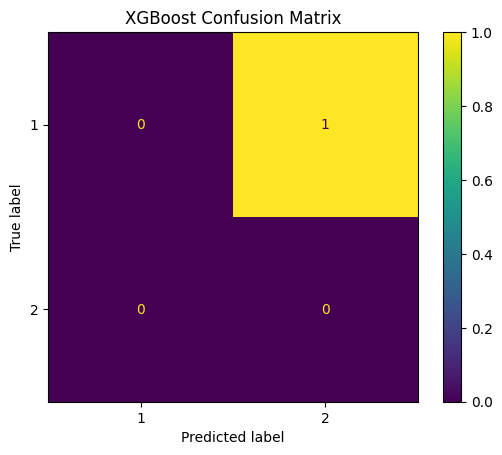

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\sudha\DS project 1\EduInsight_\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sudha\DS project 1\EduInsight_\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sudha\DS project 1\EduInsight_\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion matrix for XGBoost
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, xgb_model.predict(X_test)))


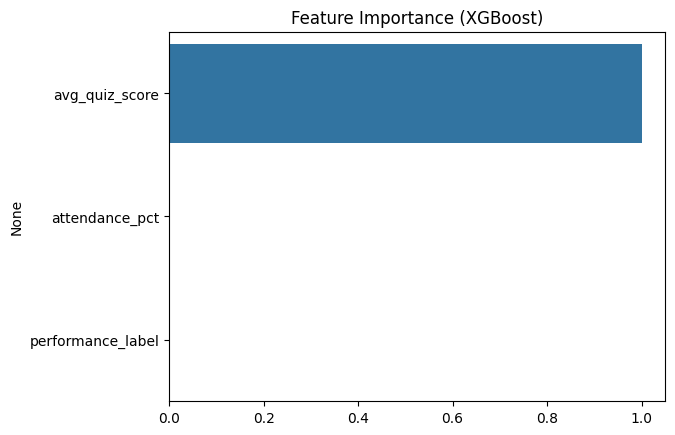

In [42]:
importances = xgb_model.feature_importances_
feature_names = X.columns

# Plot
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (XGBoost)")
plt.show()
